# PSE Take-Home Assessment 
----------------------------------------
Submission by: David Li  
Contact: davidjli@umich.edu / (248)918-8782

-------------------------------------------------------------------------------------

### Opening Thoughts on the Use Case / Task:

The task at hand is to analyze the Gas/Temp Usage Dataset (linked in the Assessment instructions) and determine a method to analyze/formulate a Machine Learning model to detect Gas Furnace customers.  

As part of strategizing and brainstorming when approaching any new tasks, it would be thoroughly advised to review the business requirements, success criteria, and anticipated challenges - identified by either the stakeholder/Data Scientist. 
This will overall lead to a more organized strategy when handling the task and identifying any potential technical/data/project risks as far in advance as possible!

#### Business/Task Requirements:
- Use a decided Machine Learning Technique to determine Gas Furnace customers
- Incorporate Visualization/Presentation Elements
- Document thoroughly 

#### Things to look out for / Anticipated Challenges:
- This is data we are not fully familiar with the collection and engineering process. So we should especially be on lookout for missing or low-quality data.
- We immediately notice that there are no existing labels with the data we are given. This will orient our thinking more directed on finding the distinction of the categories ourselves, than having existing data to denote that. That is an immediate clue that we might be looking at an unsupervised machine learning situation.
- There are various clues that hint at customers who are likely to be gas furnace users. We will need to lookout for edge cases or "halfway" scenarios and make a determination for then.

------------------------------------------------------------------

### Ingestion/Exploratory Data Analysis (EDA)

Though the Modeling is usually the more "exciting" part of the project, it's important to be well-informed on the data we are working with.  

The idea is to take a look at the variables individually (uni-variate) as well as check out a few correlation/relationships between variables (bi-variate) that we suspect may have interesting patterns. Additionally, there are other vital reasons why EDA is strongly needed for successful and clean modeling.

- Determining how to address missing/low-quality data upfront segments much of the Data Manipulation code away from the AI/ML Modelling Code, making corrections/revisions easy to add in the corresponding section (as vs. all of the code entangled together)  
- Addressing all Data Quality Issues upfront eliminates confusion between a Data process issue vs. a Modelling process issue, which is extremely relevant when we need to identify the root cause of poor model performance or make model enhancements/improvements. It saves significant time.
- It gives direction on how to initially approach the modelling steps. Learning what variables are poorly maintained, insignificant, or irrelevant can save significant time in deciding how to be constructing and setting up the model. It becomes easier to quickly start with a fairly reasonable model - especially great if deadlines or resources happen to be constrained. 

In [120]:
# Import Python Packages Necessary for Assignment
import numpy as np # Data Manipulation
import pandas as pd  # Data Manipulation
import matplotlib.pyplot as plt # Generating Graphs, especially for EDA
import seaborn as sns # Generating Graphs, especially for EDA

In [121]:
# Import Dataset
gas_df = pd.read_csv("usage_temp.csv") # Assumes dataset is in same folder as this .ipynb

In [122]:
# Preview the Data
gas_df.head()

,CUSTOMER_ID,AVG_TEMP,DAILY_USAGE
0,8,47.0,0.44
1,8,49.0,0.02
2,8,39.0,0.42
3,8,47.0,0.44
4,8,44.0,0.04


In [123]:
# Review the columns and their data types we have access to in the Dataset
for column in gas_df.columns:
    print("Data type of " + str(column) + " is " + str(gas_df[column].dtype))

Data type of CUSTOMER_ID is int64
Data type of AVG_TEMP is float64
Data type of DAILY_USAGE is float64


At this stage, it's important at a High-Level Glance to:  

Understand what information is being conveyed in the data. There looks to be 2 main types of information conveyed. 
- Identification Information: CUSTOMER_ID. Important to pay attention due to layout of data and multiple data points per customer.
- Numerical Data & Descriptors: AVG_TEMP, DAILY_USAGE. Column naming is thankfully straightforward. 
- There is no data column indicating if the customer is actually a gas or not a gas owner. So we don't have a truth label to go by.

Note what columns we have questions about their meaning or the scale/representation used.
- For AVG_TEMP, a safe assumption is these units are in Farenheit (amongst the most common temperature representations: Celsius, Farenheit, Kelvin). 
- For DAILY_USAGE, the units used are actually not entirely straightforward. Though we can use it as is for the Machine Learning Model, this would be important to get clarification when communicating results and updates to stakeholders.

Questions from this portion would entail collaborative/discovery meetings with Data SMEs, other Data Team Members (Scientists, Engineers), and stakeholders to confirm the team + stakeholders are seeing the data on the same page.



In [124]:
# Next, we would want to clean up the data to give both a better understanding and set up our modelling for success (i.e. "Garbage in Garbage Out")

# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
    gas_df.isnull().sum()) 

# Print Total Number of Rows for Relative Reference
print(" \nCount total rows in Dataframe : \n\n", 
    gas_df.shape[0])

 
Count total NaN at each column in a DataFrame : 

 CUSTOMER_ID    0
AVG_TEMP       0
DAILY_USAGE    0
dtype: int64
 
Count total rows in Dataframe : 

 751639


Even a simple exercise of counting the number of missing values will give some insight on useful variables. 

- Here, this dataset contains no missing values which is not always practical to expect. But helpful for handling the assignment.

It's also great to think about how we would handle missing data if it was relevant.
- Normally, we would want to inquire what could lead to the missing data existing in the first place (i.e Human Error, Data Gaps, Intention of N/A as a result). If the root cause is known, this can inform on how to resolve the missing data appropriately (i.e. Human error could be solved by manual correction, missing numeric values over time can involve an average between the two next adjacent data points, etc.)
- We would not need to trim data rows which have missing data in columns that are irrelevant for our model to learn from.

For this assignment, its a nice plus that we do not need to correct for any missing data. But we want to move into uni-variate analysis to see if there are low quality or anomalous data (such as outliers)

In [125]:
# Prepare an EDA Dataset containing informative rows and relevant predictive column attributes as discussed so far.
# We can work/modify our existing dataset to avoid creating more and more copies of the dataset, to preserve memory utilization

# Note: A particular step I personally find very useful and worthwhile to do is coercing all the types very early ahead of time if the dataset size is reasonable for that exercise. 
# It facilitates all future code as we know exactly what data types we are working with, and makes it easy to check for data type correctness for all future EDA and Modelling requirements.
# Takes some extra time in the beginning, but saves tons of time and headache later!

# Specify Data Types for what values we would expect
STR_COLS = ['CUSTOMER_ID'] 
FLOAT_COLS = ['AVG_TEMP', 'DAILY_USAGE']

# Coerce Data Types for what values we would expect. Note: Errors in Coercion become NA from the parameter specified.
gas_df[STR_COLS] = gas_df[STR_COLS].astype(str) # String
gas_df[FLOAT_COLS] = gas_df[FLOAT_COLS].apply(pd.to_numeric, errors = 'coerce') # FLoats/Decimals

Now the Data is ready to be explored! Keep in mind the 3 broad ideas we mentioned earlier.

- Data Scope (i.e. Size, When, Where)
- Individual Variable Breakdowns
- Multi-Variable Correlations/Trends

In [126]:
# Analyze Dataset Size 
gas_df.shape

(751639, 3)

Based on the information above, we've learned that:

- We have ~700,000 rows to work with, so quite a reasonable size to apply most classical machine learning techniques.
- The Data is organized in a way where there is a distinction of a data point by customer ID.

From the above points, we want to consider in our analysis - what we can analyze from considering all points together (disregarding customer ID grouping) as well as groupings of points (patterns within each customer ID grouping)

## Univariate EDA

We can do two sections here: one analysis section focused without grouping, and one analysis section focused with groupings by Customer ID

### No Grouping

In [127]:
# Review CUSTOMER_ID
gas_df["CUSTOMER_ID"].value_counts().sort_values(ascending = False)

CUSTOMER_ID
16466    349
18321    349
7511     349
1069     349
16599    349
        ... 
11420    301
11173    301
21411    301
11896    301
22354    301
Name: count, Length: 2280, dtype: int64

In [128]:
# Review AVG_TEMP
gas_df["AVG_TEMP"].value_counts().sort_values(ascending = False)

AVG_TEMP
45.0    43766
46.0    40841
44.0    38724
42.0    32665
43.0    30780
47.0    30319
61.0    28584
55.0    24915
63.0    24585
64.0    24512
59.0    24394
60.0    23940
58.0    23756
41.0    22980
62.0    22099
48.0    22062
54.0    19564
56.0    19415
65.0    18933
49.0    18803
40.0    18281
53.0    17040
66.0    15505
57.0    14520
39.0    14137
52.0    12873
50.0    12841
69.0    11377
68.0    11207
70.0    10459
67.0     9827
38.0     8579
72.0     8358
71.0     8002
51.0     6985
37.0     6261
36.0     4134
75.0     3231
73.0     3084
35.0     3002
31.0     2862
34.0     2581
74.0     2114
76.0     1891
33.0     1359
78.0      829
29.0      798
30.0      793
32.0      702
27.0      492
83.0      490
28.0      447
82.0      306
80.0      287
79.0      272
77.0       76
Name: count, dtype: int64

In [129]:
# Get Min/Max Values for AVG_TEMP
print(gas_df["AVG_TEMP"].min())
print(gas_df["AVG_TEMP"].max())

27.0
83.0


In [130]:
# Review DAILY_USAGE
gas_df["DAILY_USAGE"].value_counts().sort_values(ascending = False)

DAILY_USAGE
0.02    15147
0.04    12089
0.08    10437
0.06    10301
0.10    10272
        ...  
7.15        1
4.75        1
9.64        1
9.28        1
9.96        1
Name: count, Length: 581, dtype: int64

In [131]:
# Get Min/Max Values for DAILY_USAGE
print(gas_df["DAILY_USAGE"].min())
print(gas_df["DAILY_USAGE"].max())

0.02
10.0


We can build a few visuals to help us picture the data, as there are many unique values and various frequencies as we see above. Since we don't have too many data attributes to work through, this is a good use of our time in the constraints of the assignment.

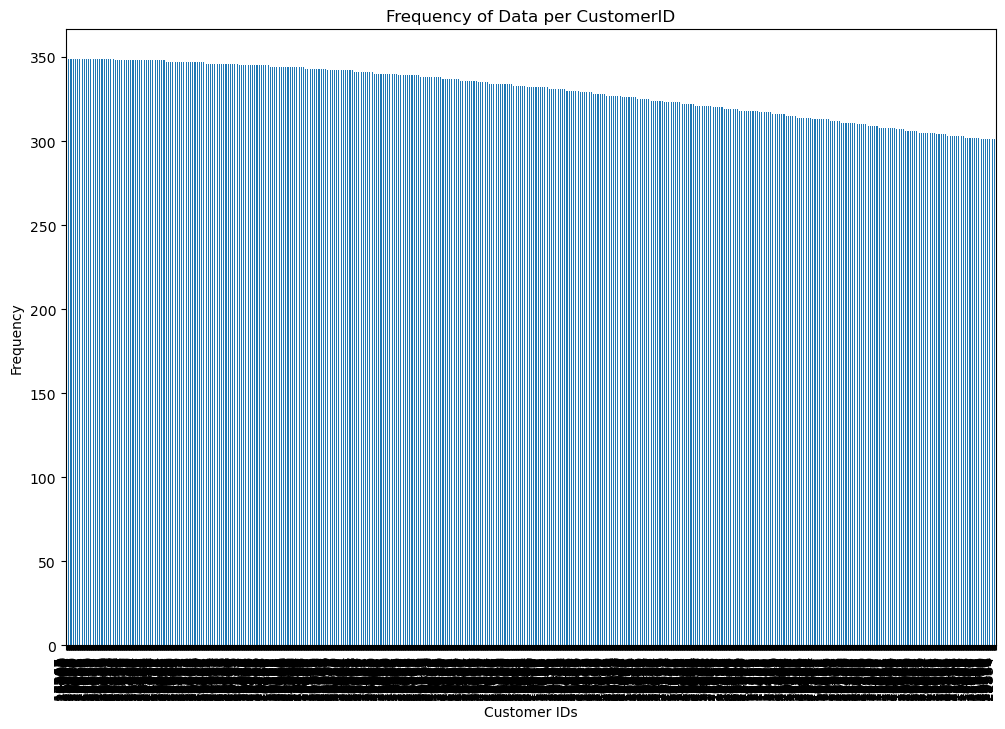

In [132]:
# Graph CUSTOMER_ID
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Frequencies, Sorted by descending frequencies
gas_df["CUSTOMER_ID"].value_counts().plot(ax=ax, kind='bar')
# Set Graph Elements (Title, Axis Labels)
ax.set(title= "Frequency of Data per CustomerID",  #Set a title and x-and y-axis labels
        ylabel= "Frequency", 
        xlabel= "Customer IDs")
# Rotate Axises
plt.xticks(rotation=90, ha='right')
plt.show()

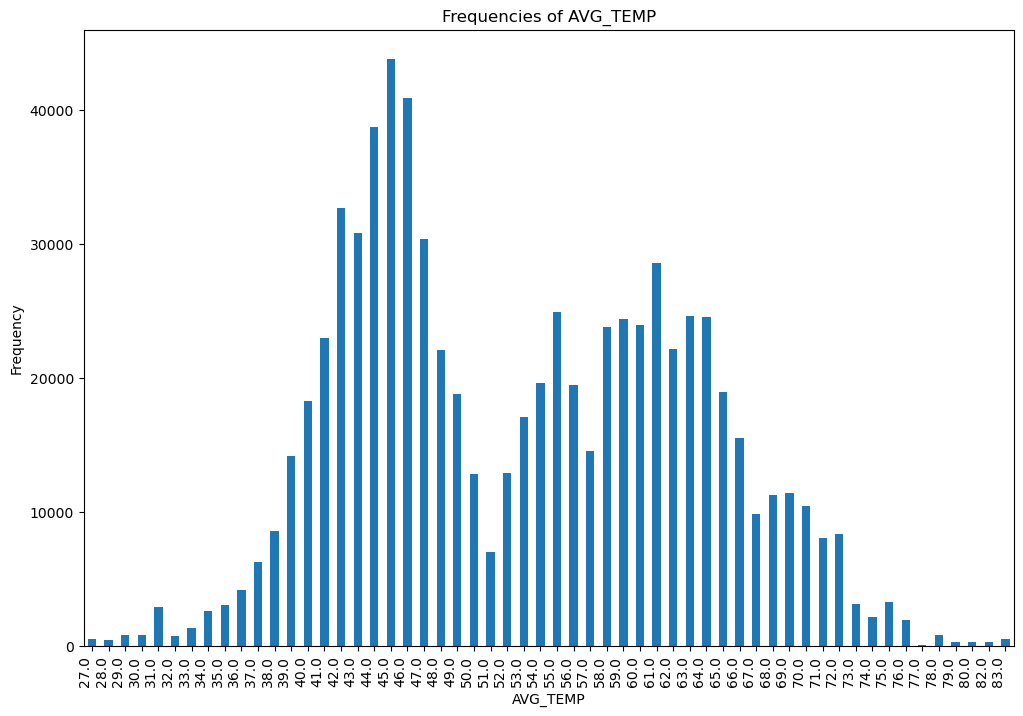

In [133]:
# Graph AVG_TEMP
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Frequencies, Sorted by AVG_TEMP
gas_df["AVG_TEMP"].value_counts(sort = False).sort_index().plot(ax=ax, kind='bar')
# Set Graph Elements (Title, Axis Labels)
ax.set(title= "Frequencies of AVG_TEMP",  #Set a title and x-and y-axis labels
        ylabel= "Frequency", 
        xlabel= "AVG_TEMP")
# Rotate Axises
plt.xticks(rotation=90, ha='right')
plt.show()

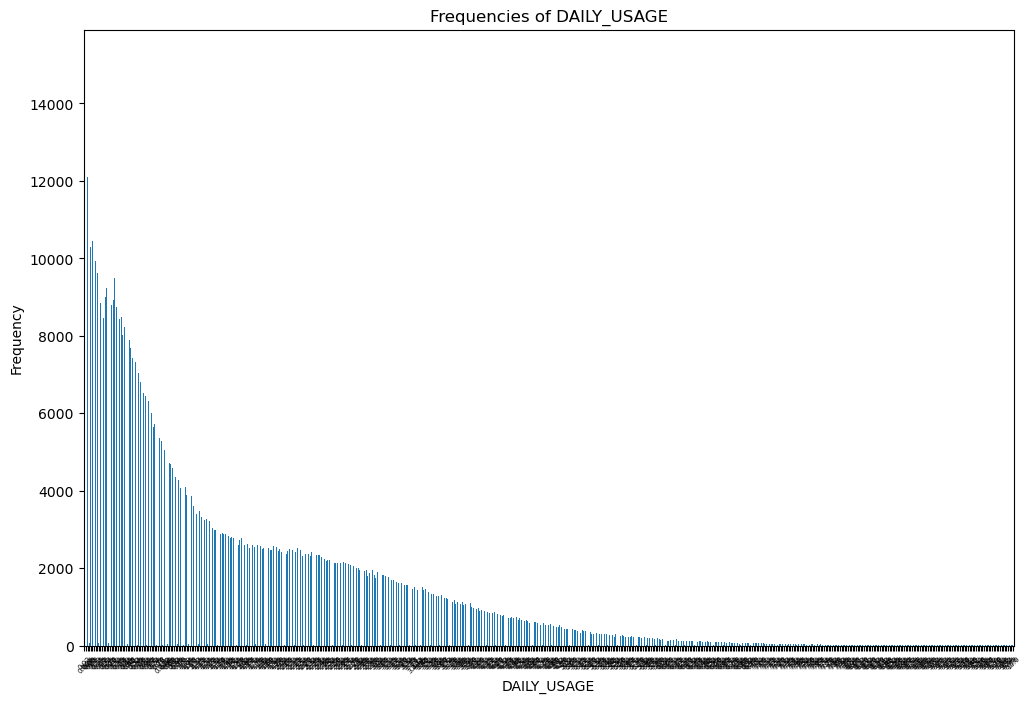

In [134]:
# Graph DAILY_USAGE
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Frequencies, Sorted by DAILY_USAGE
gas_df["DAILY_USAGE"].value_counts(sort = False).sort_index().plot(ax=ax, kind='bar')
# Set Graph Elements (Title, Axis Labels)
ax.set(title= "Frequencies of DAILY_USAGE",  #Set a title and x-and y-axis labels
        ylabel= "Frequency", 
        xlabel= "DAILY_USAGE")

# Rotate Axises
plt.xticks(rotation=45, fontsize = 5)
plt.show()

Finally, the numeric columns are perfect to run standard statistical overviews on (i.e. 5-Number Summary, Box & Whisker / Outlier Plots, etc.)

"Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values."

In [135]:
# Get 5-Number Summary for AVG_TEMP & DAILY_USAGE
gas_df.describe()

,AVG_TEMP,DAILY_USAGE
count,751639.000000,751639.000000
mean,52.834975,1.550491
std,10.089704,1.450490
min,27.000000,0.020000
25%,44.000000,0.400000
50%,52.000000,1.040000
75%,61.000000,2.400000
max,83.000000,10.000000


<Axes: title={'center': 'BoxPlot for AVG_TEMP'}>

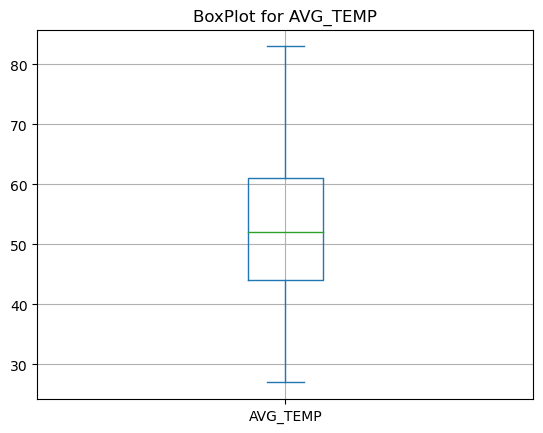

In [136]:
# Create Boxplot for Outlier Detection for AVG_TEMP
gas_df['AVG_TEMP'].plot(kind="box", title="BoxPlot for AVG_TEMP", grid = True)

<Axes: title={'center': 'BoxPlot for DAILY_USAGE'}>

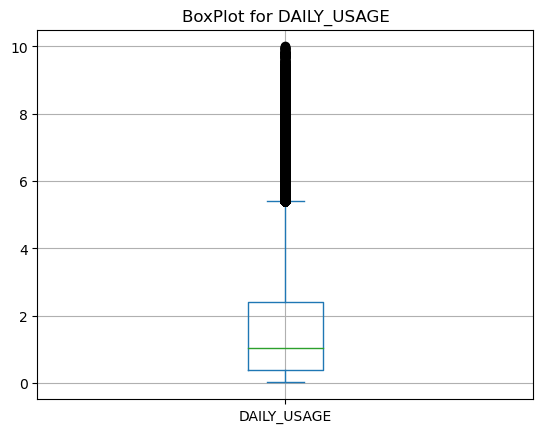

In [137]:
# Create Boxplot for Outlier Detection for DAILY_USAGE
gas_df['DAILY_USAGE'].plot(kind="box", title="BoxPlot for DAILY_USAGE", grid = True)

### Grouping by Customer ID

In [138]:
# Getting a new groupby datasets and getting aggregations
gas_grouped_df = gas_df.groupby(by = "CUSTOMER_ID").describe()
gas_grouped_df

# This will not be plotted as there are many customer IDs to go through and plot. But this dataset is generated, and can be reviewed in a tabular fashion

AVG_TEMP                                                      \
               count       mean        std   min   25%   50%   75%   max   
CUSTOMER_ID                                                                
10             322.0  53.332298   9.118371  30.0  46.0  54.0  61.0  75.0   
10005          321.0  53.161994  10.494876  28.0  45.0  53.0  63.0  78.0   
10007          334.0  54.071856  10.524143  28.0  45.0  54.0  63.0  82.0   
1001           349.0  53.214900   9.128533  30.0  46.0  54.0  61.0  75.0   
10021          336.0  54.815476  10.253002  31.0  46.0  55.0  63.0  80.0   
...              ...        ...        ...   ...   ...   ...   ...   ...   
9952           305.0  51.803279  10.448526  27.0  44.0  49.0  61.0  83.0   
9955           347.0  52.757925  10.873108  27.0  44.0  52.0  62.0  83.0   
9965           349.0  53.971347  10.630377  28.0  45.0  54.0  63.0  82.0   
9976           339.0  54.286136  10.756207  28.0  45.0  54.0  63.0  82.0   
9997           346.0  53.511561  10.533928  28.0  45.0  53.0  63.0  82.0   

            DAILY_USAGE                                                      
                  count      mean       std   min    25%   50%    75%   max  
CUSTOMER_ID                                                                  
10                322.0  0.421180  0.397703  0.06  0.140  0.24  0.595  2.24  
10005             321.0  0.295016  0.228287  0.02  0.140  0.24  0.380  1.26  
10007             334.0  0.540898  0.254002  0.18  0.340  0.50  0.660  2.56  
1001              349.0  0.166934  0.083549  0.02  0.120  0.12  0.220  0.52  
10021             336.0  0.183333  0.109940  0.02  0.120  0.16  0.220  1.12  
...                 ...       ...       ...   ...    ...   ...    ...   ...  
9952              305.0  1.574295  1.540395  0.02  0.100  1.38  2.880  8.16  
9955              347.0  0.579251  0.422958  0.02  0.140  0.56  0.880  2.08  
9965              349.0  0.554155  0.386345  0.10  0.220  0.50  0.800  1.92  
9976              339.0  0.571681  0.220951  0.08  0.460  0.60  0.700  1.58  
9997              346.0  1.718902  1.027116  0.08  0.785  1.57  2.620  4.76  

[2280 rows x 16 columns]

We learn about a few key features and facts this way:

- The distribution of Customer IDs shows that generally there are consistently about 300-350 data points per customer. This is good to be aware of, as a much dirtier dataset could have a wide variety of frequencies when considering groupings (i.e. some select customers we only have < 5 very little data points, while others we have much much more). This is relevant and carries over to later analysis in that we looked for behaviors and patterns within groups that were relatively equally sized (i.e. avoiding a grouping imbalance problem).

Withouot Grouping Done..

- The AVG_TEMP attribute shows an interesting bimodel distribution nature. An educated guess is that this is purely coincidental (i.e. theres not a particular reason why the ~50 average temperature is so low), but good to be aware of.

- DAILY_USAGE is very right-skewed, and it would be good to ask questions and consider reasons why it is distributed this way to this degree. Personally, I had anticipated a right skewed distribution but not as extreme as presented above. This also presents multiple additional considerations to remember for later - most of the usage metrics are centered in the lower region so it may be harder to distinguish here. But with the higher usage values, theyre less frequented in the data so it is easy to pick out the stand-outs.

- DAILY_USAGE's boxplot technically speaking contains many outliers. But we know from practical domain knowledge in combination with our judgment call on the distribution's nature that these values are probably entirely correct and intended - the distribution is just that strongly skewed. 

With Grouping...

- We get easy accessible distribution breakdowns per customer. From here, you can start to pick out customers with higher than average DAILY_USAGE means and medians and see what AVG_TEMP is correlated with them. There are 2280 customers, which we could theoretically go through with more individial detail with the right time.

- Keep in mind that we know our overall ranges for each data attribute, so we can use that as a frame of reference for approximating the behavior within these customer grouping distributions.

Nice-To-Haves:  
With further time, it would be great to clean up a few of these visuals for perfect presentation standard, as well as to visually explore the breakdown of the statistics within each group.

Potential Issues:  
Intuitively, these bimodal and right-skewed distributions are likely to play a part in the algorithm's learning. If the classification outcome is weak, these could be attributive causes. Because we are given information as well as with right intuition, the fact that these two variables are correlated (more in the next bivariate section) makes being aware of their individual natures fairly important as well.

Theoretically, this is the absolute minimum where you could decide a rule based on the grouping breakdowns and determine a threshold (i.e we could approximate "anyone with a median usage of higher than 2.00 and with a representative temperature range can be determined as likely gas furnace owners"). It may not be entirely correct, but setting these baselines helps immensely in guiding our modelling process and thinking.

## Bivariate EDA

### Without Grouping

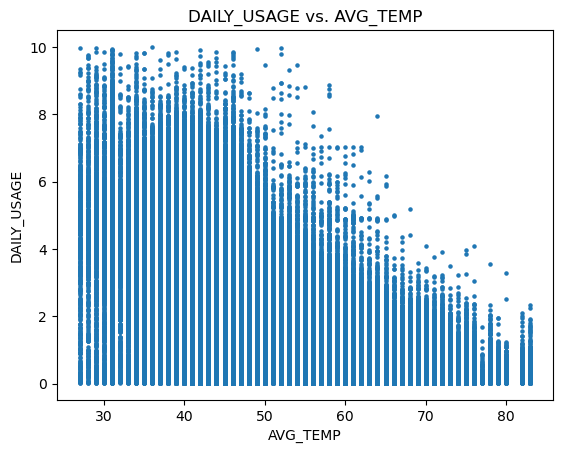

In [139]:
# Review AVG_TEMP against DAILY_USAGE

# Set Graph Formatting
ax = plt.gca()

# Set Graph Elements (Title, Axis Labels)
ax.set(title = "DAILY_USAGE vs. AVG_TEMP", ylabel = "DAILY_USAGE", xlabel = "AVG_TEMP")
# Plot
plt.scatter(gas_df["AVG_TEMP"], gas_df["DAILY_USAGE"], s = 5)

Note here we could present another potential "simple" solution to the Problem Statement. 

Because we have a visual view of the dataset and we know the expected pattern of the demographic we are looking for (i.e. High Gas Usage Users: High DAILY_USAGE, Low AVG_TEMP), we could: 

1. Visually pick out an area of the graph we are targetting (i.e. AVG_TEMP < 50, DAILY_USAGE > 5)
2. Determine customers who majority (i.e. above some determined threshold such as 50%) of their data points belong in that pinpointed area
3. Trace to their CUSTOMER_ID and determine these are the customers.

We can recall from the assignment introduction as well as the graph above that AVG_TEMP and DAILY_USAGE are likely to be correlated. Theres a few ideas to try here and give us a stronger understanding of the relationship mentioned:

- Run a Pearson Correlation Test (Simple, Determines quickly Y/N if there is a correlation and how strong)
- Run a Linear Regression and Interpret the Slope Coefficients
- Graph the evaluated regression line on our dataset and evaluate

The assumptions for the above may not be 100% clearly met, but as this dataset is relatively stable (i.e. not entirely volatile and did not have missing data), it makes rough estimations somewhat meaningful.

In [140]:
# Pearson Correlation Test
from scipy.stats import pearsonr

pearsonr(gas_df["AVG_TEMP"], gas_df["DAILY_USAGE"])

PearsonRResult(statistic=-0.6236214526743008, pvalue=0.0)

In [141]:
# Build a Simple Linear Regression Model to Test Linear Nature
import statsmodels.api as sm

#define response variable
ols_y = gas_df['DAILY_USAGE']

#define explanatory variable
ols_x = gas_df[['AVG_TEMP']]

#add constant to predictor variables
ols_x = sm.add_constant(ols_x)

#fit linear regression model
ols_model = sm.OLS(ols_y, ols_x).fit()

#view model summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            DAILY_USAGE   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 4.783e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:00:43   Log-Likelihood:            -1.1610e+06
No. Observations:              751639   AIC:                         2.322e+06
Df Residuals:                  751637   BIC:                         2.322e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2872      0.007    901.721      0.0

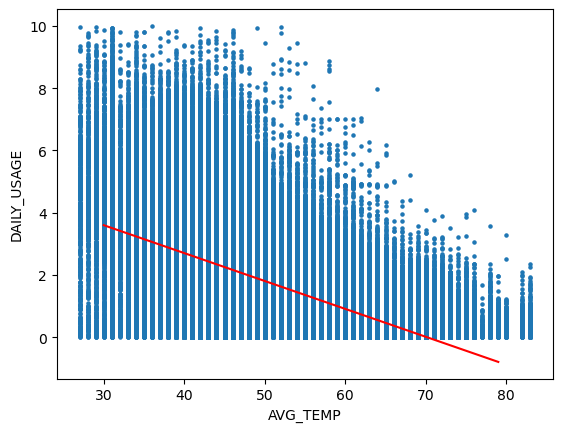

In [142]:
# Plot this regression model on the data we visualized

# Get Parameters in model for plotting
ols_p = ols_model.params

# generate x-values for your regression line (two is sufficient)
olsplot_x = np.arange(30, 80)

# scatter-plot data
ax = gas_df.plot(x='AVG_TEMP', y='DAILY_USAGE', kind='scatter', s = 5)

# plot regression line on the same axes, set x-axis limits
ax.plot(olsplot_x, ols_p.const + ols_p.AVG_TEMP * olsplot_x, color = "red")


For the Bivariate EDA, we learn further more ideas about the layout and relationship in the area. That is:

- The (tried and true) Pearson Correlation test suggests that there is a fairly strong negative correlation between AVG_TEMP and DAILY_USAGE. The first value returned from the test is -0.62 and is the test statistic; correlations range between -1 and 1, and the closer to either end of the spectrum the stronger the correlation in that direction. The second value (p-value) indicates there is such a strong correlation seen that its unlikely this relationship occured due to random chance, and is likely truly indicative of a relationship.

- The simple regression model presented similar outcomes, showing a significant F test-statistic indicating the slope component of the regression (i.e. relationship between the two variables) is strongly meaningful.

- After plotting onto our existing data, this reaffirms a pattern we had roughly glanced earlier in the Uni-Variate component.

Nice-To-Haves:  
With further time, it would be great to clean up a few of these visuals for perfect presentation standard. Additionally, this process of evaluating correlations etc. could be done within each Customer groupings of data, seeing as each group has still a sizable amount of data at ~300 points each from Law of Large Numbers. We could also compare these individual correlation analyses outcomes with the non-grouped analysis outcome and make further determinations. Another aspect is if the true label of the customres is later on tracked and recorded, we would compare the bivariate relationship and distributions of the gas furnace group users and could compare against new data - effectively another method of solving the problem statement without extensive machine learning implementation.

Potential Issues:  
We had not explicitly computed the correlation by each individual customer (giving us further basis of comparison). But individual customers could have entirely differing correlations (i.e. the gas vs non gas furnace users) so it may be worthwhile to analyze individual correlations rather than trusting an overall correlation analysis at the surface. An overall correlation metric is more reasonable when the entire dataset is representative of "one group", and is a common source of a misleading bias from concepts such as Simpson's Paradox.


### EDA Concluding Thoughts/Remarks

With a mix of data curiosity, healthy skepticism, and careful attention to data details - we've gotten very strong ideas about how the layout and trends of the gas usage data fare out. Not only do we have a strong conceptual understanding, but we've taken careful attention to prepare our Dataset to follow into the next Modelling section. We took steps to clearly designate how the data attributes should exist and function  (i.e. coercing the data types), and have addressed missing data and/or low quality data. 

As mentioned in the EDA remarks in the above sections, there would be many areas of further investigation that would absolutely be beneficial. Aside from these, we could also look to expand upon the data by considering external sources (i.e. Other Datasets that complement or extend off the information given here and/or are relevant to the Gas Usage case). We touch more on this in the final conclusion.

--------------------------------------------------------------------------------------------

### Initial / v1 Unsupervised Modelling

From the Problem Statement Definition as well as the nature of the data, we determine that this scenario is an Unsupervised Modelling need. By far the most common algorithm of choice here is Clustering, namely we can start with simpler Clustering models such as k-means. Extensive details can be found online easily, such as here: https://scikit-learn.org/stable/modules/clustering.html

Recall a few key insights/points we've gathered that should be accounted for in our modelling:

- Though certain customers may have different AVG_TEMP vs DAILY_USAGE relationships (i.e. if they are a gas furnace owner or not), the overall interpretation of temperature and usage is consistent throughout this entire exercise. Additionally, we ultimately want to determine a singular threshold for AVG_TEMP vs DAILY_USAGE to generalize to all types of customers in order to categorize which customers are likely gas furnace users or not. In another sense, it doesn't make sense to have multiple differing thresholds per each customer, as we want to be comparing/analyzing customers vs other customers. 

- For the Customer ID groups, each group has a relatively similar number of data points so there is thankfully not too much concern of imbalance on this part. Having relatively few/none outliers also makes the modelling process more stable and less affected by this commonly relevant factor.

- So as an initial approach and for ease, we can use all the data in the dataset as a whole without worrying about CUSTOMER_ID groupings. CUSTOMER_ID would be used more in the end to review the prportion of high gas Usage on a customer by customer grouping basis (i.e. perhaps if a customer has over 70% of their data points as likely to be labeled as high usage, then we make the final determination they are high usage).

From a High Level Overview Perspective, we determine our modeling process to answer the Problem Statement as follows:
- 1. Train the Clustering Model to learn 2 clusters - data points that belong in 1 cluster of likely gas furnace users, 1 clusters of likely not gas furnace users.
- 2. Review the Predicted labels per data point and analyze cluster differing characteristics.
- 3. For Each Customer Grouping, analyze the proportion of their data points that are likely gas furnace users.'
- 4. If a majority of the points above some threshold follow the gas furnace user cluster, then we make a judgment call this customer is likely a gas furnace user.


------------------------------------------------------------------

From the Technical Perspective, the General Key Steps in the (first-pass) Modelling Phase will be to:

- Perform any Data Transformations in the Dataset if necessary. This could either to synthesize/derive additional variables to help the model learn, or to re-design a few attributes so that they are better understood by the model. For example, having Start & End dates as isolated variables will not be valuable to the Model Learning - we need to transform this into an idea such as "Time between Start and End Dates" for the Model to use.

- Implement a ML model, or ideally another or two. Having accessible output and performance from two models becomes additionally helpful to discern similar patterns/advantages/interpretations gained from the Modelling process, versus relying solely upon the output of a single model implemented. For assignment brevity, we will just stick to one simple model.

- Be cognizant and aware of the performance of the model, by reviewing the performance metrics. Additionally, consider the non-technical advantages/dis-advantages of the model - interpretation, usability, monitoring, complexity of the results. As a whole, an adoption of the model in the industry greatly relies on the best of both technical and non-technical upsides.

In [143]:
# Recall the Dataset we landed on from EDA
gas_df.head()

,CUSTOMER_ID,AVG_TEMP,DAILY_USAGE
0,8,47.0,0.44
1,8,49.0,0.02
2,8,39.0,0.42
3,8,47.0,0.44
4,8,44.0,0.04


Our Preliminary Model of Choice will be k-means Clustering, particularly chosen for the context of this assignment.

Pros:
- The algorithm at a high level, the process, and results are all easy to understand and explain to technical and non-technical audiences.
- As a simpler algorithm, it is quite fast to implement and runs quickly as well. This has major advantages in operationalizing and productionizing models.
- There are many sub-types of this algorithm and it is well documented, making it easy to configure, refine, and tune to be highly performant

Cons:
- The algorithm makes multiple assumptions in light of its efficient and simple nature - the clusters must not be widely complex shapes
- Outliers strongly wreck the algorithm learning, so widely varying data or data forced to include unresolved outliers are not a good fit

In the current dataset as well as time constraint for the assignment, k-means is a very appropriate choice for our need. Below we begin the modelling procedure, one version with random cluster centers and one with anticipated cluster center information.

##### Random Cluster Center Initialization

In [144]:
# Import Modules necessary for K-means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Used to scale the attributes so different degrees of magnitutde are not an issue

# We need to scale our data so numerical columns are equally weighted even on different scales - scaled around mean of 0 and standard dev of 1
scaler = StandardScaler()
scaler.fit(gas_df)
scaled_df = scaler.transform(gas_df)

# In some scenarios, we don't know the optimal number of clusters and analysis is done to select the best number. 
# We can directly use 2 as we know our outcome is in 2 categories, gas furnace users and non gas furnace users
# We can also try 3 clusters, as we could debate 3 categories of people (extremely high usage, normal usage, low usage)

# Configure a K-means engine, set for our number of expected clusters to be 2
kmeans2 = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)
kmeans3 = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

# Run K-Means on Our Gas Usage Data
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

# Obtain Cluster Labels per Data Point
kmeans2.labels_
kmeans3.labels_

# Create a new dataset with the cluster labels to be used as however
gas_2labeled_df = gas_df.copy(deep = True)
gas_2labeled_df["Cluster_Label"] = kmeans2.labels_.tolist()

gas_3labeled_df = gas_df.copy(deep = True)
gas_3labeled_df["Cluster_Label"] = kmeans3.labels_.tolist()

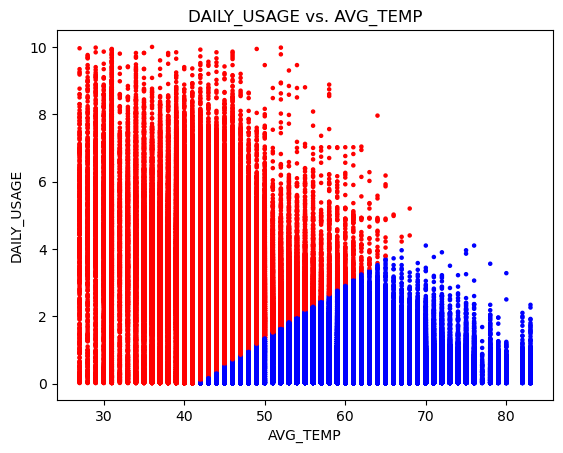

In [145]:
# Plot our 2 Cluster Random Init Model

colors2 = {0: "blue", 1: "red"}

# Set Graph Formatting
ax = plt.gca()

# Set Graph Elements (Title, Axis Labels)
ax.set(title = "DAILY_USAGE vs. AVG_TEMP", ylabel = "DAILY_USAGE", xlabel = "AVG_TEMP")
 
plt.scatter(gas_2labeled_df["AVG_TEMP"], gas_2labeled_df["DAILY_USAGE"], c = gas_2labeled_df["Cluster_Label"].map(colors2), s = 5)

plt.show()

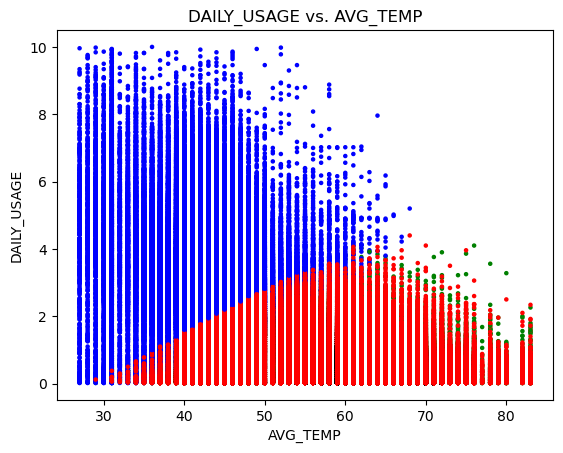

In [146]:
# Plot our 3-Cluster Random Init Model

colors3 = {0: "blue", 1: "red", 2: "green"}

# Set Graph Formatting
ax = plt.gca()

# Set Graph Elements (Title, Axis Labels)
ax.set(title = "DAILY_USAGE vs. AVG_TEMP", ylabel = "DAILY_USAGE", xlabel = "AVG_TEMP")
 
plt.scatter(gas_3labeled_df["AVG_TEMP"], gas_3labeled_df["DAILY_USAGE"], c = gas_3labeled_df["Cluster_Label"].map(colors3), s = 5)
 
plt.show()

We see some headway of cluster determination at 2 clusters. The 3 clusters scenario is fairly un-useful, but we can try also manually setting our expected cluster points as part of the initialization technique.

##### Trying Setting Cluster Centers 

We can pre-determine our expected cluster center points.

2 Clusters:  
Low/Normal Usage, Unlikely Gas Furnace User: AVG_TEMP ~ 55, DAILY_USAGE ~ 3  
High Usage, Likely Gas Furnace User: AVG_TEMP ~ 40, DAILY_USAGE ~ 6  

3 Clusters:  
Low Usage, Unlikely Gas Furnace User: AVG_TEMP ~ 65, DAILY_USAGE ~ 2  
Normal/Moderate Usage, Possible Gas Furnace User: AVG_TEMP ~ 40, DAILY_USAGE ~ 3  
High Usage, Likely Gas Furnace User: AVG_TEMP ~ 40, DAILY_USAGE ~ 6.5  

In [147]:
# Note that we need these points to be on a scaled form, as we use them in our algorithm upon a scaled dataset

# Construct the cluster points to be scaled
cluster_2centers_df = pd.DataFrame(columns=["CUSTOMER_ID", "AVG_TEMP", "DAILY_USAGE"], data=[["99999", 55, 3], ["99999", 40, 6]])
cluster_3centers_df = pd.DataFrame(columns=["CUSTOMER_ID", "AVG_TEMP", "DAILY_USAGE"], data=[["99999", 65, 2], ["99999", 40, 3], ["99999", 40, 6.5]]) 

# Scale Whole dataframe, and find the proposed cluster points in scaled form
scaled_2cluster_df = scaler.transform(cluster_2centers_df)
scaled_3cluster_df = scaler.transform(cluster_3centers_df)


After Transformation, the clusters' new values with the proper scaling are:  

2 Clusters:   
Low/Normal Usage, Unlikely Gas Furnace User: AVG_TEMP ~ 0.21457776, DAILY_USAGE ~ 0.99932446  
High Usage, Likely Gas Furnace User: AVG_TEMP ~ -1.27208725, DAILY_USAGE ~ 3.06759309  

3 Clusters:  
Low Usage, Unlikely Gas Furnace User: AVG_TEMP ~ 1.20568777, DAILY_USAGE ~ 0.30990158  
Normal/Moderate Usage, Possible Gas Furnace User: AVG_TEMP ~ -1.27208725, DAILY_USAGE ~ 0.99932446  
High Usage, Likely Gas Furnace User: AVG_TEMP ~ -1.27208725, DAILY_USAGE ~ 3.41230453  

In [148]:
# Try Same 2-Cluster & 3-Cluster Modeling, with given cluster centers

# Construct arrays for the cluster centers to be used in the model
clusters_2centersscaled_array = [[0, 0.21457776, 0.99932446], [0, -1.27208725, 3.06759309]]
clusters_3centersscaled_array = [[0, 1.20568777, 0.30990158], [0, -1.27208725, 0.99932446], [0, -1.27208725, 3.41230453]]
# Note the first indexes value does not matter - this is an arbitrary value for the scaled customer ID 

# Configure a K-means engine, set for our number of expected clusters to be 2
kmeans2_newcenter = KMeans(init = clusters_2centersscaled_array, n_clusters=2, n_init=10, random_state=1)
kmeans3_newcenter = KMeans(init = clusters_3centersscaled_array, n_clusters=3, n_init=10, random_state=1)

# Run K-Means on Our Gas Usage Data
kmeans2_newcenter.fit(scaled_df)
kmeans3_newcenter.fit(scaled_df)

# Obtain Cluster Labels per Data Point
kmeans2_newcenter.labels_
kmeans3_newcenter.labels_

# Create a new dataset with the cluster labels to be used as however
gas_2labeled_inited_df = gas_df.copy(deep = True)
gas_2labeled_inited_df["Cluster_Label"] = kmeans2.labels_.tolist()

gas_3labeled_inited_df = gas_df.copy(deep = True)
gas_3labeled_inited_df["Cluster_Label"] = kmeans3.labels_.tolist()

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


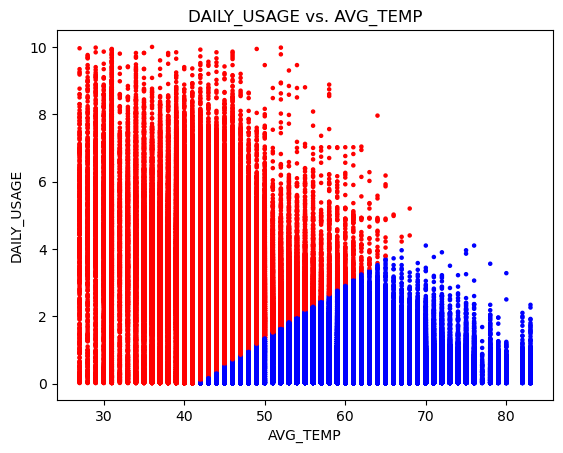

In [149]:
# Plot our 2 Cluster New Init Model

colors2 = {0: "blue", 1: "red"}
 
# Set Graph Formatting
ax = plt.gca()

# Set Graph Elements (Title, Axis Labels)
ax.set(title = "DAILY_USAGE vs. AVG_TEMP", ylabel = "DAILY_USAGE", xlabel = "AVG_TEMP")

plt.scatter(gas_2labeled_inited_df["AVG_TEMP"], gas_2labeled_inited_df["DAILY_USAGE"], c = gas_2labeled_inited_df["Cluster_Label"].map(colors2), s = 5)
 
plt.show()

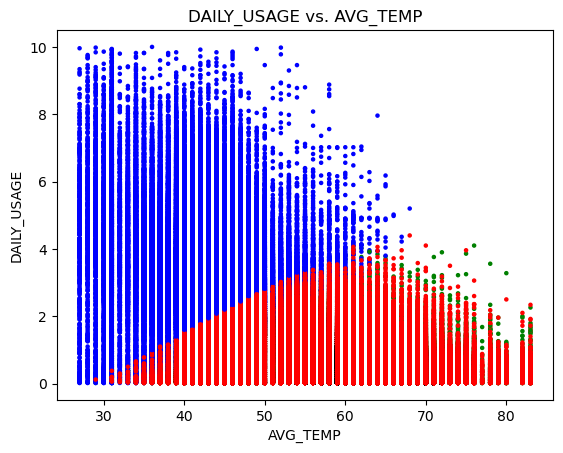

In [150]:
# Plot our 3-Cluster New Init Model

colors3 = {0: "blue",d", 2: "green"}
 1: "re
# Set Graph Formatting
ax = plt.gca()

# Set Graph Elements (Title, Axis Labels)
ax.set(title = "DAILY_USAGE vs. AVG_TEMP", ylabel = "DAILY_USAGE", xlabel = "AVG_TEMP")
 
plt.scatter(gas_3labeled_inited_df["AVG_TEMP"], gas_3labeled_inited_df["DAILY_USAGE"], c = gas_3labeled_inited_df["Cluster_Label"].map(colors3), s = 5)
 
plt.show()

Even with pre-specified cluster centers, the model outcome was identical as random initializing.

### Applying back to original Data to obtain list of Customers in High Gas Usage Cohort 

Based from the modelling outcome and visual depiction, we now have every data point falling into a High Usage Cluster (shown as blue) or Normal/Low Usage Cluster (shown as red).

The final step is to review within each customer and determine their percentage of High Usage data points.   

**Our Classification Criteria: If Customer's proportion of High Gas Usage Data Points is > 0.5, Determine Customer is High Usage Customer and Likely Gas Furnace User**  

We can then extract a list of customers meeting this criteria.  

In [151]:
# Get Original Data Frame with Cluster Labels.
# Reminder that Cluster Label of 0 is the High Usage Cohort
gas_2labeled_df

,CUSTOMER_ID,AVG_TEMP,DAILY_USAGE,Cluster_Label
0,8,47.0,0.44,0
1,8,49.0,0.02,0
2,8,39.0,0.42,1
3,8,47.0,0.44,0
4,8,44.0,0.04,0
...,...,...,...,...
751634,21700,43.0,3.12,1
751635,21700,38.0,4.28,1
751636,21700,39.0,6.06,1
751637,21700,42.0,5.60,1


In [152]:
# As of now, summation by groups would give inverted proportions (i.e Higher Proportions in the Groupby Indicate Lower Quantity of High Usage).
# This is due to the nature of the default 0, 1 Cluster Labeling.
# So We Can Create a New Column to avoid this confusion

gas_2labeled_df["Higher_Usage_Flag"] = gas_2labeled_df["Cluster_Label"].apply(lambda x: 1 if x == 0 else 0)

In [153]:
gas_2labeled_df

,CUSTOMER_ID,AVG_TEMP,DAILY_USAGE,Cluster_Label,Higher_Usage_Flag
0,8,47.0,0.44,0,1
1,8,49.0,0.02,0,1
2,8,39.0,0.42,1,0
3,8,47.0,0.44,0,1
4,8,44.0,0.04,0,1
...,...,...,...,...,...
751634,21700,43.0,3.12,1,0
751635,21700,38.0,4.28,1,0
751636,21700,39.0,6.06,1,0
751637,21700,42.0,5.60,1,0


In [154]:
# Create a groupby by CUSTOMER_ID, and get proportion of High Usage Data Points
gas_ML_agg_df = gas_2labeled_df.groupby(['CUSTOMER_ID']).apply(lambda x: x['Higher_Usage_Flag'].sum()/len(x))

# Convert above groupby object into a dataframe so we can filter accordingly for High Usage Customers
gas_final_df = gas_ML_agg_df.reset_index(name = "PROPORTION_HIGH_USAGE")

In [155]:
# Review
gas_final_df

,CUSTOMER_ID,PROPORTION_HIGH_USAGE
0,10,0.726708
1,10005,0.763240
2,10007,0.769461
3,1001,0.853868
4,10021,0.857143
...,...,...
2275,9952,0.478689
2276,9955,0.587896
2277,9965,0.681948
2278,9976,0.710914


In [159]:
# Obtain List of CUSTOMER_IDs where we determined they overall have a high usage, and most likely Gas Furnace users as a result
Likely_Gas_Furnace_List = gas_final_df[gas_final_df["PROPORTION_HIGH_USAGE"] > 0.70]["CUSTOMER_ID"].tolist()

In [160]:
# Review
Likely_Gas_Furnace_List

['10',
 '10005',
 '10007',
 '1001',
 '10021',
 '10036',
 '10121',
 '10126',
 '10134',
 '10286',
 '10362',
 '10364',
 '10397',
 '10471',
 '10554',
 '10556',
 '10622',
 '10820',
 '10997',
 '11048',
 '1107',
 '11109',
 '11389',
 '11422',
 '11580',
 '11761',
 '11775',
 '1178',
 '11871',
 '11896',
 '11919',
 '11921',
 '11997',
 '12090',
 '12193',
 '12228',
 '12517',
 '12569',
 '12576',
 '12589',
 '12769',
 '12840',
 '12891',
 '13',
 '13028',
 '13085',
 '13128',
 '13226',
 '1334',
 '13469',
 '13488',
 '13529',
 '1361',
 '13648',
 '13793',
 '13890',
 '13943',
 '13963',
 '14075',
 '14144',
 '14156',
 '14234',
 '1441',
 '14471',
 '1460',
 '14761',
 '14788',
 '1481',
 '1490',
 '14954',
 '15030',
 '15048',
 '15071',
 '15143',
 '15209',
 '15218',
 '15242',
 '15261',
 '15270',
 '15293',
 '15300',
 '15391',
 '15430',
 '15522',
 '15582',
 '15757',
 '15772',
 '15791',
 '15919',
 '16045',
 '16400',
 '16536',
 '16580',
 '16714',
 '16733',
 '16734',
 '16764',
 '16788',
 '16814',
 '16824',
 '16846',
 '168

In [161]:
# Compare Number of Customers we found High Usage, against Total Unique Customers in Dataset

# Number of Customers Found High Usage
print(len(Likely_Gas_Furnace_List))
# Number of Unique Customers
print(len(gas_df["CUSTOMER_ID"].unique()))

243
2280


------------------------------------------------------------------------------

### Modeling Concluding Thoughts / Remarks

Our Modelling was complete and we were able to determine data points indicative of High Gas Usage, and the customers associated with this cluster and these points. Additionally, we could retrieve an exact list of Customer IDs where enough of their Gas Usage data points were deemed high usage.

We need to revisit multiple key points and reflect on our Modeling Process.

Assumptions:  
- Performance of a Model is always dependent on how well the Model assumptions are met as well.  
- K-Means favors clusters with "spherical and isotropic" natures, so odd cluster patterns will not be captured.
- Sizes and Variance of the clusters would optimally be as similar between clusters as possible. Otherwise an imbalance can cause deformed cluster determination and/or improper learning.  

- We used a self-determined arbitrary threshold (0.5) for the proportion of High Usage points in each customer before labeled them as High Usage / Likely Gas Furnace Users.  
- In reality, this may be overly simplistic and the threshold number could be changed. This would depend on alignment with stakeholders and the technical team.  

Areas of Improvement:  
- As a direct result of the assumptions above, it would be vital to constantly be aligned with stakeholders and ask questions that require domain knowledge/input. The threshold number is a good example of this.
- Many of the visual graphs could be better cleaned up and presented.  
- Try to better understand the DAILY_USAGE attribute, as we're still unsure of the units used here.

Extensions/Future Considerations:
- Worthwhile to consider alternative / more complex unsupervised algorithms in addition.  
- If available, incorporating further data attributes to enhance the dataset and model learning.